In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [82]:
# importing file
columns = ['age','workclass','fnlwgt','education','education_num','marital_status','occupation',
    'relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','income']
adult = pd.read_csv(r'E:\6\adult_data.csv', names = columns)

In [83]:
adult.head(20)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [84]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### Data Cleaning
In that messey data most of the columns had white spaces. There was no null value but there is some '?' (Question mark) values and there was some deplicates value.
In this data cleaning process **white space** has been removed and those question marked value was replaced by **"unknown"** word. **Duplicate** values was removed after this process.

In [85]:
# Discarding spaces from entries

colm = ['workclass','marital_status','occupation','relationship','race','sex','native_country','income']

for col in colm:
    adult[col] = adult[col].str.strip()

In [87]:
# Null values
adult.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [88]:
# Duplicates
print("Before removing duplicates:",adult.duplicated().sum())

adult = adult.drop_duplicates()

print("After removing duplicates:",adult.duplicated().sum())

Before removing duplicates: 24
After removing duplicates: 0


In [89]:
# Counting values

for i,j in zip(adult.columns,(adult.values.astype(str) == '?').sum(axis = 0)):
    if j > 0:
        print(str(i) + ' : ' + str(j) + ' records')



workclass : 1836 records
occupation : 1843 records
native_country : 582 records


In [90]:
# Changing this '?' to unknown
change_columns = ['workclass','occupation','native_country']

for column in change_columns:
    adult[column] = adult[column].replace({'?':'unknown'})

### Data Exploration

In [91]:
# Features
features = adult.shape[1]

# Records
records = adult.shape[0]

# Number of income which is more than $50K
records_greater_50 = adult[adult['income'] == '>50K'].shape[0]

# Number of records which is less than and equal to $50K
records_less_equal_50 = adult[adult['income'] == '<=50K'].shape[0]

# Percentage of making more than $50K
percentage = (records_greater_50/records)*100 

print('Total numbers of record: {}'.format(records))
print('Total numbers of features: {}'.format(features))
print('Individuals making more than $50K: {}'.format(records_greater_50))
print('Percentage of making more than $50K is: {:.2f}%'.format(percentage))  

Total numbers of record: 32537
Total numbers of features: 15
Individuals making more than $50K: 7839
Percentage of making more than $50K is: 24.09%


In [92]:
adult.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


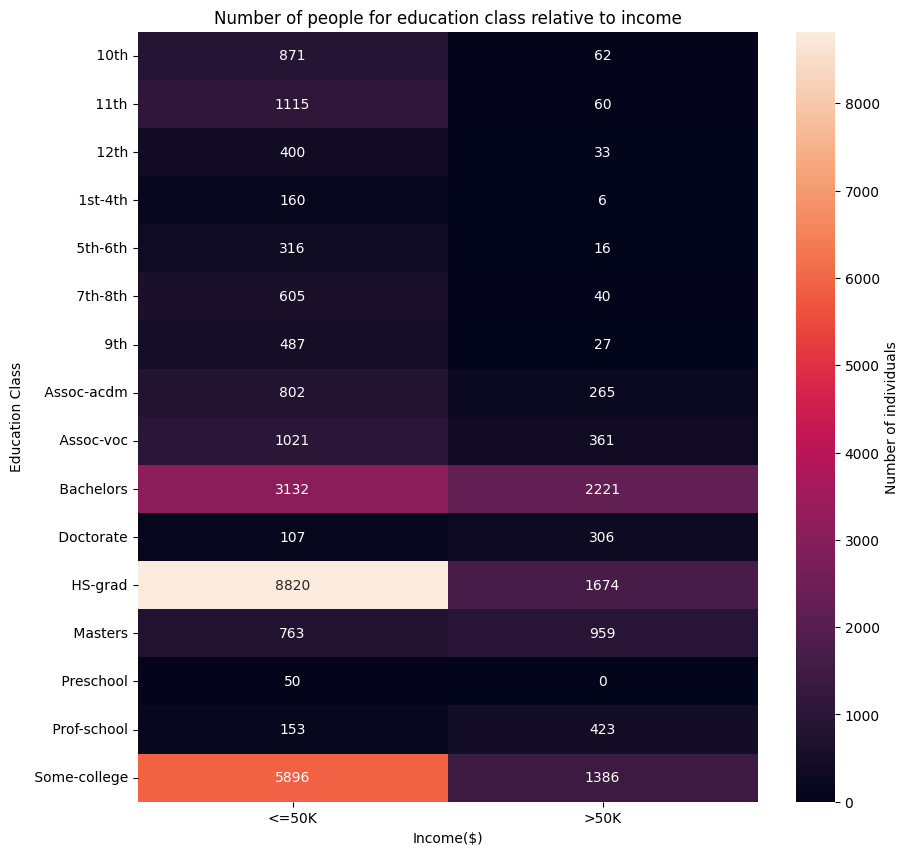

In [93]:
# Heatmap
plt.figure(figsize=[10,10])

crosstab = pd.crosstab(adult['education'], adult['income'])
sns.heatmap(crosstab, annot = True, fmt = 'd', cbar_kws = {'label':'Number of individuals'})

plt.title('Number of people for education class relative to income')
plt.xlabel('Income($)')
plt.ylabel('Education Class');

# Another way 

# groupby = cens.groupby(['education_num','income']).size()
# count  = groupby.reset_index(name='count')
# pivot = ct_counts.pivot(index='education_num',columns='income',values='count').fillna(0)

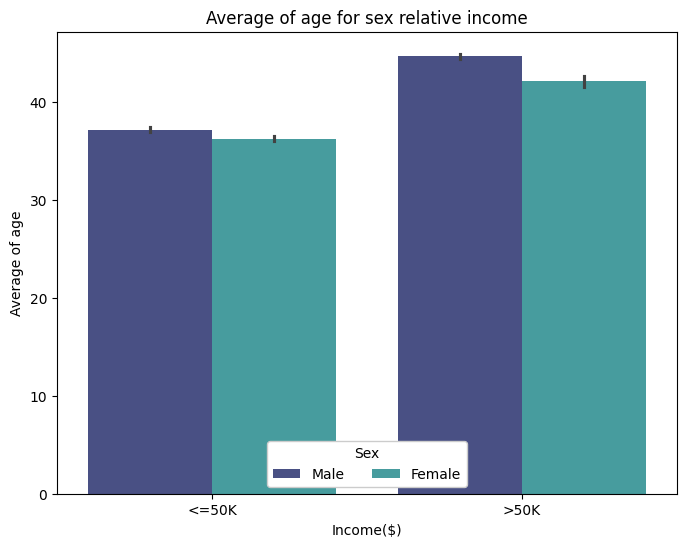

In [94]:
# Clustered Bar Chart
plt.figure(figsize=[8,6])

barplot = sns.barplot(adult, x = 'income', y = 'age', palette = 'mako', hue = 'sex')
barplot.legend(loc = 8, ncol = 3 , framealpha = 1, title = 'Sex')

plt.title('Average of age for sex relative income')
plt.xlabel('Income($)')
plt.ylabel('Average of age');

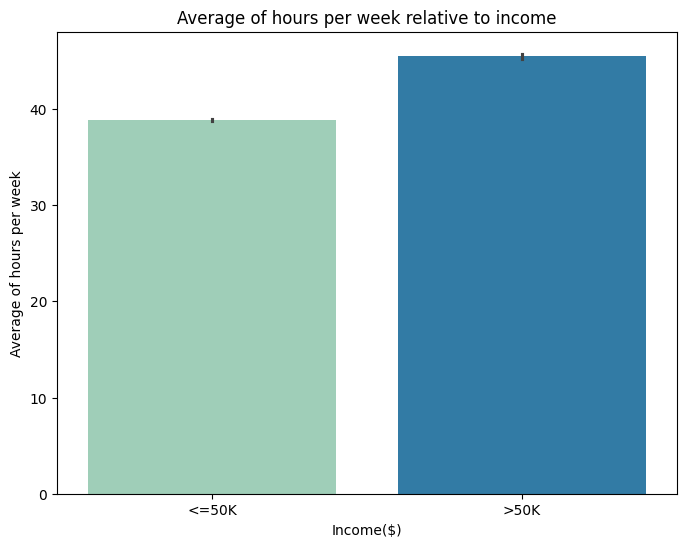

In [95]:
# Bar Chart

plt.figure(figsize=[8,6])

sns.barplot(adult, x = 'income', y = 'hours_per_week', palette = 'YlGnBu',
            legend = False, hue = 'income')

plt.title('Average of hours per week relative to income')
plt.xlabel('Income($)')
plt.ylabel('Average of hours per week');

### Data Preprocessing

**Scaling:** Standardizing or normalizing numerical features to ensure that they are on a similar scale, preventing certain features from dominating others in the analysis or modeling process.    
**Encoding Categorical Variables:** Converting categorical variables into numerical representations that can be used by machine learning algorithms.   
Note : We are using copy version of this data so that we can use the intact main version later 

In [96]:
adult_copy = adult.copy()

In [97]:
# Scalling
from sklearn.preprocessing import MinMaxScaler

numeric = ['age','capital_gain','hours_per_week','fnlwgt']
scaler = MinMaxScaler()

adult_copy[numeric] = scaler.fit_transform(adult_copy[numeric])
adult_copy.sample(3)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
20213,0.109589,Private,0.115417,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,1579,0.397959,United-States,<=50K
6254,0.082192,Private,0.113102,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,Female,0.0,0,0.397959,United-States,<=50K
25028,0.178082,Private,0.228422,9th,5,Married-civ-spouse,Craft-repair,Husband,Other,Male,0.0,0,0.397959,Mexico,<=50K


In [98]:
# Encoding

# Replacing values in 'sex' column and income column
adult_copy['sex'] = adult_copy['sex'].replace({'Female':0, 'Male':1})
adult_copy['income'] = adult_copy['income'].replace({'<=50K':0, '>50K':1})

# Creating dummy varivales for other catagorical column
adult_copy = pd.get_dummies(adult_copy)  


In [99]:
encoded = list(adult_copy.columns)
print('Total {} featuers after one hot encoding'.format(len(encoded)))

Total 108 featuers after one hot encoding


### Experimental Process


In [108]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [103]:
# Splitting data
X = adult_copy.drop('income', axis = 1)
y = adult_copy['income']

In [104]:
# Training and testing
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [105]:
models = {}
models['LogisticRegression'] = LogisticRegression()
models['RandomForest'] = RandomForestClassifier()
models['AdaBoost'] = AdaBoostClassifier()

In [106]:
# Cross Validation
for model_name in models:
    model = models[model_name]
    results = cross_validate(model, X, y, cv=5, scoring = ['accuracy','f1'], return_train_score = True)
    
    print(model_name +":")
    print("Accuracy :","Train :", results['train_accuracy'].mean(),"| Test :",results['test_accuracy'].mean())
    print("F1-Score :","Train :",results['train_f1'].mean(),"| Test :",results['test_f1'].mean())
    print("-----------------------------------------------------------------")

LogisticRegression:
Accuracy : Train : 0.836570700191416 | Test : 0.8354797051333966
F1-Score : Train : 0.6223055528289345 | Test : 0.619963983258035
-----------------------------------------------------------------
RandomForest:
Accuracy : Train : 0.9999308484299856 | Test : 0.8530905112918441
F1-Score : Train : 0.9998564758587826 | Test : 0.6697418129055004
-----------------------------------------------------------------
AdaBoost:
Accuracy : Train : 0.861657524431178 | Test : 0.860097985347726
F1-Score : Train : 0.6815345295196784 | Test : 0.6777428485824999
-----------------------------------------------------------------


### Feature Importance
Dropping the columns which has less importance in the dataset to predict income

In [119]:
adult_cpy = adult.copy() 

In [120]:
# Transforming object data type into integers  

for i in adult_cpy.columns:
    if adult_cpy[i].dtypes == "object":
        encoder = LabelEncoder()
        adult_cpy[i] = encoder.fit_transform(adult_cpy[col])

In [121]:
# Dividing the data 

Xc = adult_cpy.drop('income', axis = 1)
yc = adult_cpy['income']

Xc_train,Xc_test,yc_train,yc_test = train_test_split(Xc, yc, test_size = 0.2, random_state = 42)

In [122]:
rfc = RandomForestClassifier()
forest = rfc.fit(Xc,yc)

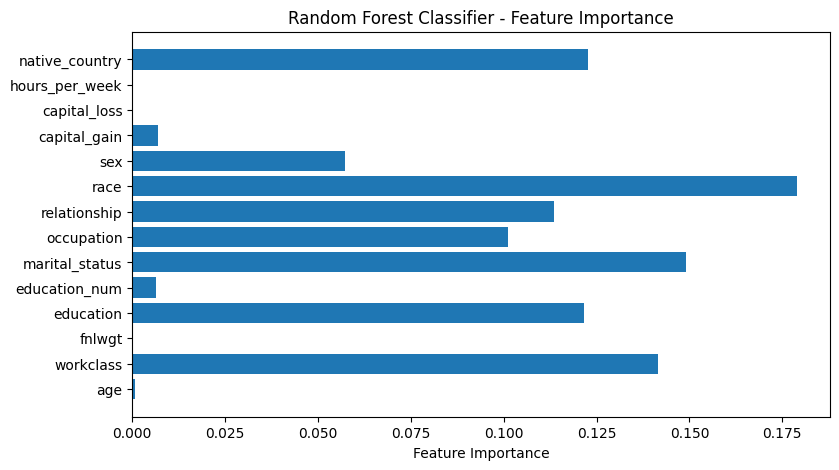

In [133]:
# List of features and important score
plt.figure(figsize=[9,5])

feature_impo = rfc.fit(Xc,yc)
feature_impo = rfc.feature_importances_
feature_nam = list(Xc.columns)

plt.barh(range(len(feature_impo)), feature_impo ,align='center')
plt.yticks(range(len(feature_impo)), feature_nam)
plt.xlabel('Feature Importance')
plt.title('Random Forest Classifier - Feature Importance');

Hours per week, capital loss, capital gain, education num, fnlwgt, age   
These list of columns has less importance in the dataset.

In [124]:
adult_cc = adult.copy()

In [125]:
adult_cc.drop(['fnlwgt','hours_per_week','capital_loss','education_num','age','capital_gain'],axis = 1, inplace = True)

In [126]:
adult_cc.head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [127]:
# Encoder

adult_cc['sex'] = adult_cc['sex'].replace({'Male': 1, 'Female':0})
adult_cc['income'] = adult_cc['income'].replace({"<=50K" : 0, ">50K" : 1})

# Create dummy variables
adult_cc = pd.get_dummies(adult_cc)

# Splitting data
Xf = adult_cc.drop('income', axis = 1)
yf = adult_cc['income']

# Oversampling
ros = RandomOverSampler()
X_sampled, y_sampled = ros.fit_resample(Xf,yf)

In [128]:
rfc = RandomForestClassifier()

final_result = cross_validate(rfc,X_sampled,y_sampled, cv = 5, scoring = ['accuracy','f1'], return_train_score = True)
print("Accuracy :" , "Train :", final_result['train_accuracy'].mean(), "| Test :", final_result['test_accuracy'].mean())
print("F1-score :" , "Train :", final_result['train_f1'].mean(), "| Test :", final_result['test_f1'].mean())

Accuracy : Train : 0.8527664211617043 | Test : 0.8303709479847861
F1-score : Train : 0.8612015329190535 | Test : 0.8412402366421892


The accuracy score has not increased but the f1 score has been increased

### Conclusion

In [129]:
adult_final = adult.copy()
adult.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [130]:
ros = RandomOverSampler(random_state = 42)
X_resampled,y_resampled = ros.fit_resample(X,y)
Xr_train,Xr_test,yr_train,yr_test = train_test_split(X_resampled, y_resampled, test_size = 0.2, random_state =42)

In [131]:
rfc = RandomForestClassifier()
results = cross_validate(rfc, X_resampled, y_resampled, cv = 5, scoring = ['accuracy','f1'], return_train_score = True)

print("Accuracy :","Train :",results['train_accuracy'].mean(),"| Test :",results['test_accuracy'].mean())
print("F1-Score :","Train :",results['train_f1'].mean(),"| Test :", results['test_f1'].mean())

Accuracy : Train : 0.9999797554201676 | Test : 0.9344685533006054
F1-Score : Train : 0.9999797558043808 | Test : 0.9376470501732118


Therefore, it has shown that without dropping unimportant columns accuracy and f1 score has increased, but after dropping columns these scores has decreased. This dataset is trainned without dropping less important columns and because of that we could get more accuracy.